# In this notebook, we predict fertilizers  suitable to your crops according to the chemical present in the soil.

In [63]:
#importing necessary libaries

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import tree
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
#reading data

df=pd.read_csv('fertilizer.csv')

In [65]:
df.drop(columns='Unnamed: 0',inplace=True)

In [66]:
df

,Crop,N,P,K,pH,soil_moisture
0,rice,80,40,40,5.5,30
1,maize,80,40,20,5.5,50
2,chickpea,40,60,80,5.5,60
3,kidneybeans,20,60,20,5.5,45
4,pigeonpeas,20,60,20,5.5,45
5,mothbeans,20,40,20,5.5,30
6,mungbean,20,40,20,5.5,80
7,blackgram,40,60,20,5.0,60
8,lentil,20,60,20,5.5,90
9,pomegranate,20,10,40,5.5,30


# Performing EDA

In [67]:
df.dtypes

Crop              object
N                  int64
P                  int64
K                  int64
pH               float64
soil_moisture      int64
dtype: object

In [68]:
df.shape

(22, 6)

In [69]:
df.size

132

In [70]:
df.isnull().sum()

Crop             0
N                0
P                0
K                0
pH               0
soil_moisture    0
dtype: int64

In [71]:
df.head()

,Crop,N,P,K,pH,soil_moisture
0,rice,80,40,40,5.5,30
1,maize,80,40,20,5.5,50
2,chickpea,40,60,80,5.5,60
3,kidneybeans,20,60,20,5.5,45
4,pigeonpeas,20,60,20,5.5,45


In [72]:
df.tail()

,Crop,N,P,K,pH,soil_moisture
17,papaya,50,50,50,6.0,20
18,coconut,20,10,30,5.0,45
19,cotton,120,40,20,5.5,70
20,jute,80,40,40,5.5,20
21,coffee,100,20,30,5.5,20


In [73]:
df.columns

Index(['Crop', 'N', 'P', 'K', 'pH', 'soil_moisture'], dtype='object')

In [74]:
df.describe()

,N,P,K,pH,soil_moisture
count,22.000000,22.000000,22.000000,22.000000,22.000000
mean,50.454545,45.681818,48.181818,5.409091,46.363636
std,36.315715,32.634172,51.698426,0.590326,20.827055
min,20.000000,10.000000,10.000000,4.000000,15.000000
25%,20.000000,20.000000,20.000000,5.500000,30.000000
50%,30.000000,40.000000,30.000000,5.500000,45.000000
75%,80.000000,60.000000,50.000000,5.500000,60.000000
max,120.000000,125.000000,200.000000,6.500000,90.000000


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Crop           22 non-null     object 
 1   N              22 non-null     int64  
 2   P              22 non-null     int64  
 3   K              22 non-null     int64  
 4   pH             22 non-null     float64
 5   soil_moisture  22 non-null     int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.2+ KB


In [76]:
df['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [77]:
df['Crop'].value_counts()

rice           1
maize          1
jute           1
cotton         1
coconut        1
papaya         1
orange         1
apple          1
muskmelon      1
watermelon     1
grapes         1
mango          1
banana         1
pomegranate    1
lentil         1
blackgram      1
mungbean       1
mothbeans      1
pigeonpeas     1
kidneybeans    1
chickpea       1
coffee         1
Name: Crop, dtype: int64

<AxesSubplot: >

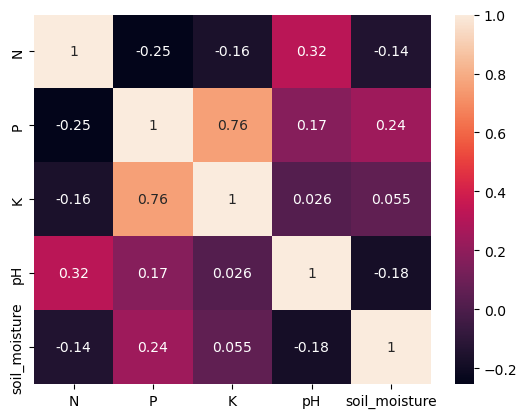

In [78]:
sns.heatmap(df.corr(),annot=True)

In [79]:
df.dtypes

Crop              object
N                  int64
P                  int64
K                  int64
pH               float64
soil_moisture      int64
dtype: object

In [80]:
# seperating features and target label

features=df[['N', 'P','K', 'pH', 'soil_moisture']]
target=df['Crop']
labels=df['Crop']

In [81]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [87]:
#train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size = 0.2,random_state =2)

# Decision Tree

In [86]:
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=2,max_depth=5)  
classifier.fit(X_train,y_train)
predicted_values=classifier.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  0.0
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00       0.0
      banana       0.00      0.00      0.00       1.0
   blackgram       0.00      0.00      0.00       1.0
    chickpea       0.00      0.00      0.00       1.0
     coconut       0.00      0.00      0.00       1.0
      coffee       0.00      0.00      0.00       0.0
      cotton       0.00      0.00      0.00       1.0
      grapes       0.00      0.00      0.00       1.0
        jute       0.00      0.00      0.00       1.0
 kidneybeans       0.00      0.00      0.00       1.0
       maize       0.00      0.00      0.00       1.0
       mango       0.00      0.00      0.00       1.0
   mothbeans       0.00      0.00      0.00       1.0
    mungbean       0.00      0.00      0.00       1.0
   muskmelon       0.00      0.00      0.00       1.0
      orange       0.00      0.00      0.00       1.0
      papaya       0.00      0.00      0.00    

In [62]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB()
naivebayes.fit(X_train,y_train)
predicted_values=naivebayes.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes Accuracy is: ", x)

print(classification_report(y_test,predicted_values))

Naive Bayes Accuracy is:  0.0
              precision    recall  f1-score   support

       apple       0.00      0.00      0.00       0.0
      coffee       0.00      0.00      0.00       0.0
      cotton       0.00      0.00      0.00       1.0
      grapes       0.00      0.00      0.00       1.0
        jute       0.00      0.00      0.00       0.0
      lentil       0.00      0.00      0.00       0.0
       maize       0.00      0.00      0.00       0.0
    mungbean       0.00      0.00      0.00       1.0
   muskmelon       0.00      0.00      0.00       1.0
        rice       0.00      0.00      0.00       1.0

    accuracy                           0.00       5.0
   macro avg       0.00      0.00      0.00       5.0
weighted avg       0.00      0.00      0.00       5.0

